In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [56]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [57]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


This dataset has 28 x 28 images. The rows of the dataset are the labels for each image and the columns are the pixel values.

Data exploration to check if the number of data points per label/sign has a similar distribution in the training set:

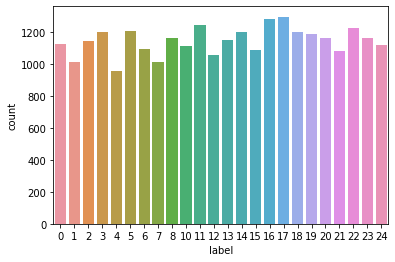

In [58]:
sns.countplot(train['label'])

Get the data in the right format

In [59]:
train_labels = train['label']
train.drop('label', axis = 1, inplace = True)

In [60]:
train_images = train.values
train_images = np.array([np.reshape(i, (28, 28)) for i in train_images])
train_images = np.array([i.flatten() for i in train_images])

In [61]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
train_labels = label_binrizer.fit_transform(train_labels)

In [62]:
train_images.shape

(27455, 784)

In [63]:
train_labels.shape

(27455, 24)

How the train images look:

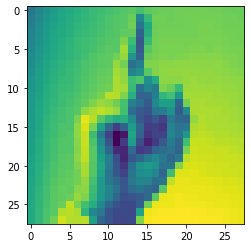

In [64]:
plt.imshow(train_images[0].reshape(28,28))

In [65]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

In [66]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [67]:
test_labels = label_binrizer.fit_transform(test_labels)

In [68]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [69]:
test_images.shape

(7172, 28, 28, 1)

In [70]:
test_labels.shape

(7172, 24)

Split the train data into a train/test split to train the CNN model:
(the x_train and y_train need to be of the same dimensions to train model - which the given train (4D) and test (2D) aren't)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size = 0.3, random_state = 101)

Normalize:

In [72]:
x_train = x_train / 255
x_test = x_test / 255

In [73]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**CNN Model**

In [74]:
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import RMSprop


In [75]:
# model = models.Sequential()
# model.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(28, 28,1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.20))
# model.add(layers.Dense(24, activation='softmax'))

# model.summary()

In [78]:
# First 4 layers of model
model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # Dropout reduces overfitting
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

In [79]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [80]:
epochs = 15
batch_size = 64

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/15
19218/19218 [==============================] - 55s 3ms/step - loss: 1.3489 - accuracy: 0.5897 - val_loss: 0.1577 - val_accuracy: 0.9550
Epoch 2/15
19218/19218 [==============================] - 59s 3ms/step - loss: 0.1566 - accuracy: 0.9485 - val_loss: 0.0057 - val_accuracy: 0.9994
Epoch 3/15
19218/19218 [==============================] - 59s 3ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/15
19218/19218 [==============================] - 59s 3ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 5/15
19218/19218 [==============================] - 59s 3ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 2.2922e-04 - val_accuracy: 1.0000
Epoch 6/15
19218/19218 [==============================] - 59s 3ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 1.6162e-05 - val_accuracy: 1.0000
Epoch 7/15
19218/19218 [==============================] - 59s

In [81]:
predictions = model.predict(test_images)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions.round())

0.9380925822643614

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

7172/7172 [==============================] - 5s 640us/step
Test accuracy: 0.9380925893783569


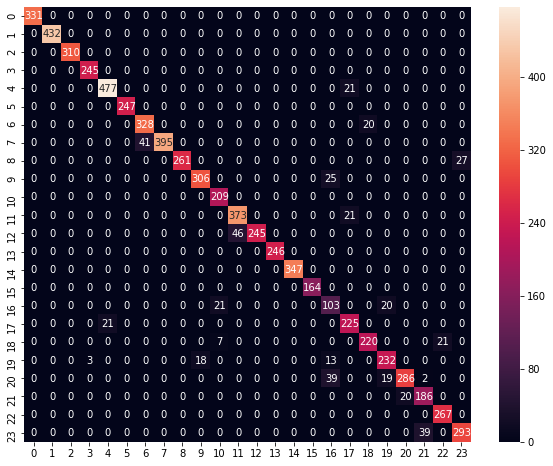

In [84]:
from sklearn.metrics import confusion_matrix
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(predictions, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels,axis = 1) 
# Create confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");